In [17]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [18]:
# Function to convert to milliseconds
def to_gb(val):
    if pd.isna(val):
        return None
    val = str(val).strip().lower()

    if val.endswith("gb"):
        return float(val.replace("gb", "").strip())
    elif val.endswith("mb"):
        return float(val.replace("mb", "").strip()) / 1000.0
    else:
        # assume it's already GB
        return float(val)


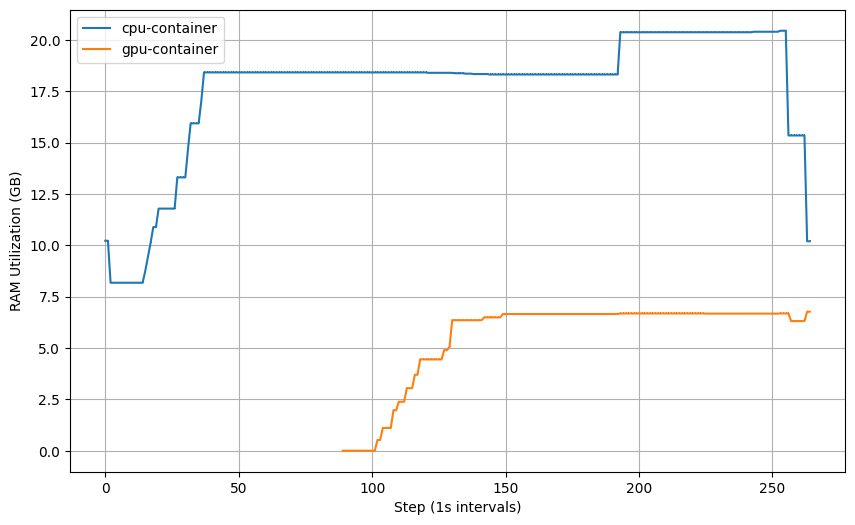

In [21]:
# RAM Utilization Auto

# Load all CSV files
# Load CSVs
csv_files_auto_ram = glob.glob("./data/auto/*resources.csv")

dfs_auto_ram = []
for file in csv_files_auto_ram:
    df = pd.read_csv(file, usecols=["ram-cpu_user-container", "ram-gpu_user-container"])
    df["ram-cpu_user-container"] = df["ram-cpu_user-container"].apply(to_gb)
    df["ram-gpu_user-container"] = df["ram-gpu_user-container"].apply(to_gb)
    dfs_auto_ram.append(df)

# Combine into one DataFrame
combined_auto = pd.concat(dfs_auto_ram, axis=1)

means_auto_cpu_container = combined_auto["ram-cpu_user-container"].mean(axis=1)
means_auto_gpu_container = combined_auto["ram-gpu_user-container"].mean(axis=1)

plt.figure(figsize=(10,6))

plt.plot(means_auto_cpu_container.index, means_auto_cpu_container, marker=",", label="cpu-container")
plt.plot(means_auto_gpu_container.index, means_auto_gpu_container, marker=",", label="gpu-container")

plt.xlabel("Step (1s intervals)")
plt.ylabel("RAM Utilization (GB)")
plt.legend()
plt.grid(True)
plt.show()



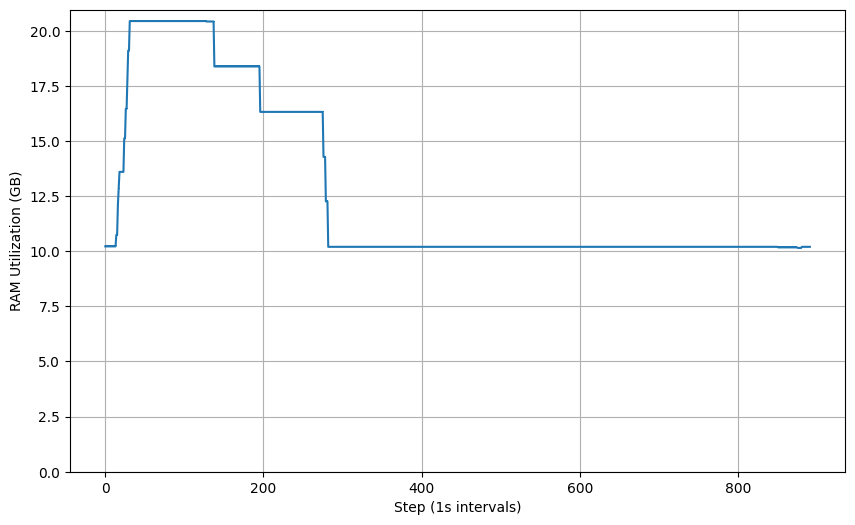

In [15]:
# RAM Utilization CPU mode

# Load all CSV files
csv_files_ram = glob.glob("./data/cpu/*resources.csv")

# clean
dfs_ram = []
for file in csv_files_ram:
    df = pd.read_csv(file, usecols=["ram_user-container"])
    df["ram_user-container"] = df["ram_user-container"].apply(to_gb)
    dfs_ram.append(df)


combined_ram = pd.concat(dfs_ram, axis=1)
combined_ram.fillna(0)

means_ram = combined_ram.mean(axis=1)

plt.figure(figsize=(10,6))

plt.plot(means_ram.index, means_ram, marker=",")

plt.xlabel("Step (1s intervals)")
plt.ylabel("RAM Utilization (GB)")
plt.ylim(bottom=0)  # y-axis starts at 0
# plt.legend()
plt.grid(True)
plt.show()

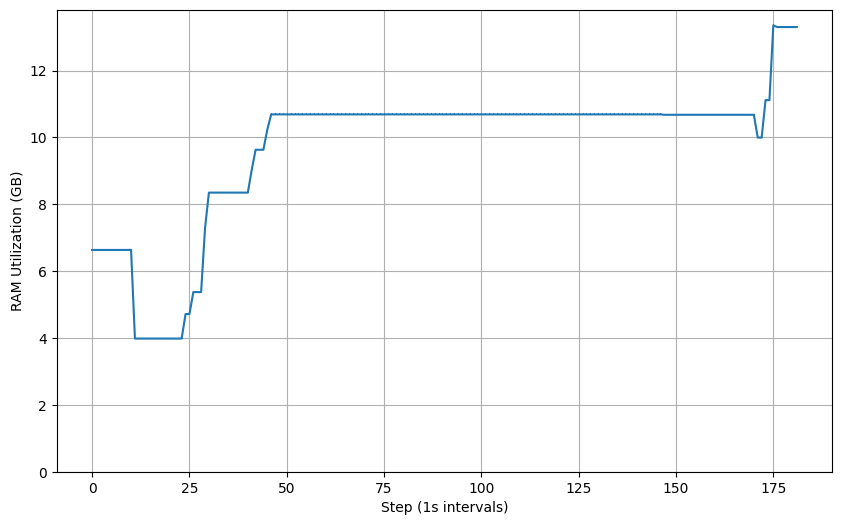

In [16]:
# RAM Utilization GPU mode

# Load all CSV files
csv_files_ram = glob.glob("./data/gpu/*resources.csv")

# clean
dfs_ram = []
for file in csv_files_ram:
    df = pd.read_csv(file, usecols=["ram_user-container"])
    df["ram_user-container"] = df["ram_user-container"].apply(to_gb)
    dfs_ram.append(df)


combined_ram = pd.concat(dfs_ram, axis=1)
combined_ram.fillna(0)

means_ram = combined_ram.mean(axis=1)

pd.set_option('display.max_rows', None)

plt.figure(figsize=(10,6))

# only between index 200 and 400
# means_cpu = means_cpu[25:75]
# print(means_ram)

plt.plot(means_ram.index, means_ram, marker=",")

plt.xlabel("Step (1s intervals)")
plt.ylabel("RAM Utilization (GB)")
plt.ylim(bottom=0)  # y-axis starts at 0
# plt.legend()
plt.grid(True)
plt.show()